<a href="https://colab.research.google.com/github/BireNbarik/Metal-Forming-Lab/blob/main/Metal_Forming_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **BPE06003: Metal Forming Lab. Report**











## BPE06003:Metal Forming Lab with Google colab, Python, Virtual Lab.

---

Virtual Lab.: [Metal Forming Virtual Simulation Lab](https://msvs-dei.vlabs.ac.in/)

This is a starter notebook for Metal Forming Lab. 2k22

---

##  Introduction

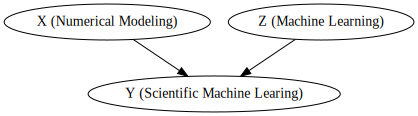

In [ ]:
from graphviz import Digraph # TODO add pygraphviz to dependencies
g = Digraph('Scitific Machine Learning')
g.node('X', label='X (Numerical Modeling)')
g.node('Y', label='Y (Scientific Machine Learing)')
g.node('Z', label='Z (Machine Learning)')
g.edge('X','Y')
g.edge('Z', 'Y')
g.render('Scientific Machine Learing_graph', format='png') 
# Uncomment the line if you want to save the figure
g